In [331]:
import re
import pandas as pd

In [332]:
file=open('_chat.txt','r',encoding='utf-8')

In [333]:
file1=file.read()

In [334]:
print(file1)

[20/03/2019, 5:12:32 PM] Technion Indians 🇮🇳: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.
[20/03/2019, 5:12:32 PM] ~ Barun: ‎~ Barun created this group
[20/03/2019, 5:12:32 PM] Technion Indians 🇮🇳: ‎You were added
[28/06/2022, 12:28:31 AM] ~ Abhisek: Hi, does anyone have any experience of sending money to an US account holder via bank? Plz let me know.
[29/06/2022, 1:50:53 PM] Mihir Mogra: Mata Ni Pachedi is a 300-year old rare yet beautiful textile hand-painting art form uncommonly referred to as the "Kalamkari of Gujarat".

Compelled and intrigued by what the art form is and want to try your hands at it, enroll now at https://forms.gle/1UPwUFtULkKUwCEd8 

📅30 June
🕒1900hrs
‎[29/06/2022, 1:50:53 PM] Mihir Mogra: ‎image omitted
‎[29/06/2022, 1:50:53 PM] Mihir Mogra: ‎image omitted
[29/06/2022, 1:50:54 PM] Mihir Mogra: The workshop will be held in virtual format on Zoom
[29/06/2022, 7:02:56 PM] ~ Princy: Hello

In [335]:
print(len(file1))

468517


In [336]:
pattern='\[\d{1,2}/\d{1,2}/\d{4},\s\d{1,2}:\d{2}:\d{2} [APMapm]{2}\]'
messages=re.split(pattern,file1)[1:]
len(messages)

4386

In [338]:
messages

[' Technion Indians 🇮🇳: \u200eMessages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.\n',
 ' ~\u202fBarun: \u200e~\u202fBarun created this group\n',
 ' Technion Indians 🇮🇳: \u200eYou were added\n',
 ' ~\u202fAbhisek: Hi, does anyone have any experience of sending money to an US account holder via bank? Plz let me know.\n',
 ' Mihir Mogra: Mata Ni Pachedi is a 300-year old rare yet beautiful textile hand-painting art form uncommonly referred to as the "Kalamkari of Gujarat".\n\nCompelled and intrigued by what the art form is and want to try your hands at it, enroll now at https://forms.gle/1UPwUFtULkKUwCEd8 \n\n📅30 June\n🕒1900hrs\n\u200e',
 ' Mihir Mogra: \u200eimage omitted\n\u200e',
 ' Mihir Mogra: \u200eimage omitted\n',
 ' Mihir Mogra: The workshop will be held in virtual format on Zoom\n',
 " ~\u202fPrincy: Hello! I have a jio sim and it shows NO SERVICE since few months . I tried doing a recharge but it didn't work t

In [339]:
dates=re.findall(pattern,file1)
dates

['[20/03/2019, 5:12:32\u202fPM]',
 '[20/03/2019, 5:12:32\u202fPM]',
 '[20/03/2019, 5:12:32\u202fPM]',
 '[28/06/2022, 12:28:31\u202fAM]',
 '[29/06/2022, 1:50:53\u202fPM]',
 '[29/06/2022, 1:50:53\u202fPM]',
 '[29/06/2022, 1:50:53\u202fPM]',
 '[29/06/2022, 1:50:54\u202fPM]',
 '[29/06/2022, 7:02:56\u202fPM]',
 '[29/06/2022, 7:15:09\u202fPM]',
 '[29/06/2022, 7:15:51\u202fPM]',
 '[29/06/2022, 7:41:21\u202fPM]',
 '[29/06/2022, 7:41:32\u202fPM]',
 '[29/06/2022, 7:41:45\u202fPM]',
 '[29/06/2022, 7:42:05\u202fPM]',
 '[29/06/2022, 7:47:25\u202fPM]',
 '[29/06/2022, 9:24:28\u202fPM]',
 '[29/06/2022, 9:25:27\u202fPM]',
 '[29/06/2022, 9:26:38\u202fPM]',
 '[30/06/2022, 10:42:12\u202fAM]',
 '[30/06/2022, 10:40:58\u202fAM]',
 '[30/06/2022, 10:41:57\u202fAM]',
 '[30/06/2022, 10:44:27\u202fAM]',
 '[30/06/2022, 10:45:54\u202fAM]',
 '[30/06/2022, 11:56:52\u202fAM]',
 '[30/06/2022, 12:41:19\u202fPM]',
 '[30/06/2022, 2:58:26\u202fPM]',
 '[30/06/2022, 9:00:21\u202fPM]',
 '[01/07/2022, 9:53:51\u202fAM]',
 '[01/

In [340]:
df=pd.DataFrame({'user_message':messages,'message_date':dates})

#convert type of date
df['message_date']=pd.to_datetime(df['message_date'],format="[%d/%m/%Y, %I:%M:%S %p]")
df['message_date'] = df['message_date'].dt.strftime("%Y-%m-%d %I:%M:%S %p")

df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Technion Indians 🇮🇳: ‎Messages and calls are ...,2019-03-20 05:12:32 PM
1,~ Barun: ‎~ Barun created this group\n,2019-03-20 05:12:32 PM
2,Technion Indians 🇮🇳: ‎You were added\n,2019-03-20 05:12:32 PM
3,"~ Abhisek: Hi, does anyone have any experienc...",2022-06-28 12:28:31 AM
4,Mihir Mogra: Mata Ni Pachedi is a 300-year ol...,2022-06-29 01:50:53 PM


In [341]:
import datetime

# Your datetime object
date_time_obj = datetime.datetime.strptime("2019-03-20 17:12:32", "%Y-%m-%d %H:%M:%S")

# Format with AM/PM
formatted_time = date_time_obj.strftime("%Y-%m-%d %I:%M:%S %p")

# Print the result
print(formatted_time)

2019-03-20 05:12:32 PM


In [342]:
#separate the user and their message in seprate columns
user=[]
message=[]
for messages in df['user_message']:
    text=re.split('([\w\W]+?):\s',messages)
    if text[1:]:
        user.append(text[1])
        message.append(text[2])
    else:
        user.append('group_notification')
        message.append(text[0])

df['user']=user
df['user'] = df['user'].apply(lambda name: name.split('~\u202f')[-1].strip() if '\u202a' not in name else '')
df['message']=message
df.drop('user_message',axis=1,inplace=True)
df= df.dropna(subset=['user'])


In [343]:
df.sample(5)

,date,user,message
1854,2023-05-11 08:24:11 AM,~ Vinod Kole ~,‎image omitted\n‎
451,2022-08-28 10:58:13 PM,Mathews B,"Hi, I am leaving Israel and selling my Ikea Mi..."
1574,2023-04-20 09:48:47 PM,Ritu Gupta,"Hi, \nI had come to Technion as visiting facul..."
9,2022-06-29 07:15:09 PM,Akanksha Dubey,‎Contact card omitted\n
4014,2023-11-08 03:51:20 PM,Baja,"As far as I know, they probably have extended ..."


In [344]:
#to extract the year fro datetime first i need to convert it into same format
df['datetime_column'] = pd.to_datetime(df['date'], format='%Y-%m-%d %I:%M:%S %p')

# Now, we can use the .dt accessor to extract the year
df['year'] = df['datetime_column'].dt.year
df['month'] = df['datetime_column'].dt.month_name()
df['day'] = df['datetime_column'].dt.day
df['hour'] = df['datetime_column'].dt.hour
df['minute'] = df['datetime_column'].dt.minute
df.drop('datetime_column',axis=1, inplace=True)

In [345]:
df.head(10)

,date,user,message,year,month,day,hour,minute
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50
5,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n‎,2022,June,29,13,50
6,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n,2022,June,29,13,50
7,2022-06-29 01:50:54 PM,Mihir Mogra,The workshop will be held in virtual format on...,2022,June,29,13,50
8,2022-06-29 07:02:56 PM,Princy,Hello! I have a jio sim and it shows NO SERVIC...,2022,June,29,19,2
9,2022-06-29 07:15:09 PM,Akanksha Dubey,‎Contact card omitted\n,2022,June,29,19,15


In [346]:
df[df['user']=='Mahesh Nayak']

,date,user,message,year,month,day,hour,minute
531,2022-09-13 05:47:45 PM,Mahesh Nayak,‎~ Rohith Polisetty added ~ Mahesh Nayak\n,2022,September,13,17,47
538,2022-09-14 09:50:02 AM,Mahesh Nayak,Hi.. This is Mahesh from Hyderabad. Am a new p...,2022,September,14,9,50
539,2022-09-14 09:50:08 AM,Mahesh Nayak,Thanks\n,2022,September,14,9,50
542,2022-09-14 06:24:20 PM,Mahesh Nayak,Thanks\n,2022,September,14,18,24
668,2022-10-03 04:30:01 PM,Mahesh Nayak,‎‎Your security code with ‪+91 85005 82081‬ ch...,2022,October,3,16,30
669,2022-10-03 05:05:43 PM,Mahesh Nayak,‎‎Your security code with ‪+91 85005 82081‬ ch...,2022,October,3,17,5
861,2022-11-13 10:05:46 AM,Mahesh Nayak,‎‎Your security code with ‪+91 85005 82081‬ ch...,2022,November,13,10,5


In [347]:
df.sample(10)

,date,user,message,year,month,day,hour,minute
1527,2023-04-06 09:07:27 AM,Apurva,,2023,April,6,9,7
455,2022-08-29 09:21:52 AM,Sumana,‎‎~ Sumana changed their phone number to a new...,2022,August,29,9,21
3223,2023-10-12 07:51:46 PM,Akshay,😅😅\n,2023,October,12,19,51
1309,2023-02-21 02:13:24 PM,Apurva,My admission as postdoc in Mech. dept. is in p...,2023,February,21,14,13
3864,2023-10-24 02:50:19 PM,Sriman,Hey if you are bored just do something else do...,2023,October,24,14,50
1286,2023-02-19 06:31:31 PM,veeresh1590,"So, with out a valid Israel visa, indian embas...",2023,February,19,18,31
973,2022-12-07 07:44:50 PM,Labanya Bhattacharya,"If you are interested to buy, pls txt as soon ...",2022,December,7,19,44
1818,2023-05-11 08:19:59 AM,~ Vinod Kole ~,‎image omitted\n‎,2023,May,11,8,19
1915,2023-05-11 08:31:29 AM,~ Vinod Kole ~,‎image omitted\n‎,2023,May,11,8,31
3387,2023-10-13 03:19:36 PM,Sriman,,2023,October,13,15,19


In [348]:
df['user'].unique()




array(['Technion Indians 🇮🇳', 'Barun', 'Abhisek', 'Mihir Mogra', 'Princy',
       'Akanksha Dubey', 'veeresh1590', 'Shubham B. Deshmukh',
       'Sanketh Vedula', 'Ms Rakhee (INDIAN EMBASSY)', '', 'Mkd',
       'Sumit Malik', 'Hemanta Deka', 'S. Bhunia', 'Akanksha Technion',
       'Krishna Manookar(Technion)', '~Navdeep', 'Maitri', 'Naveen',
       'Ashwini Krishna', 'Sumana', 'Anuj Bisht', 'Chandra Shekhar Pant',
       'Jainik Technion India', 'Shubhendu Pandey', 'Dr. Chandrakanth G.',
       'Ramu D', 'Sudeepthi', 'Navneet Technion', 'Abhishek Banerjee',
       'Kamal', 'Santhosh', 'Ganga Babu', 'A', 'Rutvija',
       'Rishona Daniels', 'Jibu Tom Jose', 'Shiladitya Chattopadhyay',
       'Suraj Krishna M S', 'manishiiser1012', 'Yogendra Kumar',
       'YOGENDRA KUMAR', 'Akshay', 'chemsabari1988', 'aNkItA',
       'Arghyadeep Basu', 'Satya Sainadh', 'L Mallick', 'Rajib Sharma',
       'Abhijit Mitra', 'RK', 'Saikat Bhattacharjee', 'Ankit Kumar Shah',
       'Ashish Tiwari', 'Niloy',

In [349]:
words=[]
for message in df['message']:
    words.extend(message.split())



In [350]:
len(words)

45705

In [351]:
df[df['message'].str.contains('omitted', case=False, na=False)].shape[0]
df[df['message'].str.contains('omitted', case=False, na=False)]

,date,user,message,year,month,day,hour,minute
5,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n‎,2022,June,29,13,50
6,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n,2022,June,29,13,50
9,2022-06-29 07:15:09 PM,Akanksha Dubey,‎Contact card omitted\n,2022,June,29,19,15
25,2022-06-30 12:41:19 PM,Ms Rakhee (INDIAN EMBASSY),English Version - PIBA Notification Employment...,2022,June,30,12,41
42,2022-07-03 05:27:45 PM,Ms Rakhee (INDIAN EMBASSY),‎image omitted\n,2022,July,3,17,27
...,...,...,...,...,...,...,...,...
4333,2024-01-26 09:35:51 AM,Sumit Malik,‎image omitted\n,2024,January,26,9,35
4335,2024-01-26 09:43:36 AM,Ashwini Krishna,‎image omitted\n,2024,January,26,9,43
4338,2024-01-26 10:20:14 AM,Ankit Kumar Shah,‎GIF omitted\n,2024,January,26,10,20
4344,2024-01-26 11:57:00 AM,Nirman Chakraborty,‎image omitted\n,2024,January,26,11,57


In [352]:
! pip install urlextract

In [353]:
from urlextract import URLExtract

extractor=URLExtract()
Urls=[]
for message in df['message']:
    Urls.extend(extractor.find_urls(message))
    

In [354]:

df['urls']=Urls

ValueError: Length of values (121) does not match length of index (4386)

In [211]:
len(Urls)

121

In [212]:
x=df['user'].value_counts().head()

In [213]:
import matplotlib.pyplot as plt


In [214]:
name=x.index
count=x.values

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Akshay'),
  Text(1, 0, '~ Vinod Kole ~'),
  Text(2, 0, 'Samrat Chakraborty'),
  Text(3, 0, '~Navdeep'),
  Text(4, 0, 'Pratibha')])

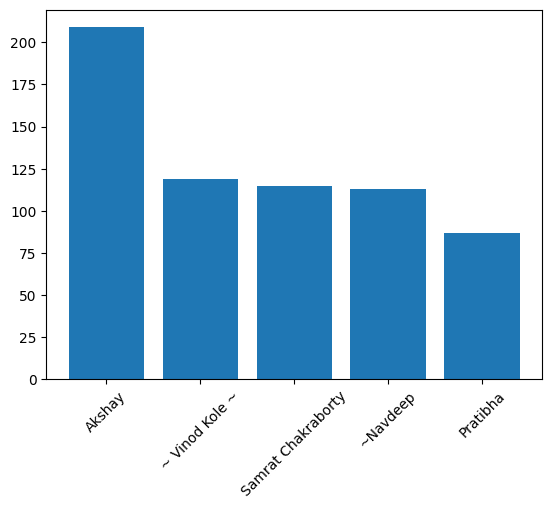

In [215]:
plt.bar(name,count)
plt.xticks(rotation=45)

In [216]:
#percentage of messages send by  users 
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'user': 'User', 'count': 'Percentage'})


,User,Percentage
0,Akshay,4.77
1,~ Vinod Kole ~,2.71
2,Samrat Chakraborty,2.62
3,~Navdeep,2.58
4,Pratibha,1.98
...,...,...
289,Sumita Dahiya,0.02
290,Jithu,0.02
291,Jonathan,0.02
292,Dr. Shweta,0.02


In [217]:
! pip install wordcloud

In [218]:

df1 = df[~df['message'].str.contains('omitted', case=False)]
df1

,date,user,message,year,month,day,hour,minute
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50
...,...,...,...,...,...,...,...,...
4381,2024-02-07 09:21:49 PM,Kuheli,No it doesn't... You need to go to the French ...,2024,February,7,21,21
4382,2024-02-07 09:39:28 PM,Aneek,Ok. Thanks. How much time does it need to get ...,2024,February,7,21,39
4383,2024-02-07 09:54:10 PM,Ashwini Krishna,15 days\n,2024,February,7,21,54
4384,2024-02-07 09:54:20 PM,Ashwini Krishna,"If it's urgent, 7 days\n",2024,February,7,21,54


In [219]:
f=open('stop_hinglish.txt','r')
stop_words=f.read()
print(stop_words)


.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [227]:
f=open('stop_hinglish.txt','r')
original_stop_words = f.read()
stop_words = {word.lower() for word in original_stop_words.split()}

words=[]
for message in df1['message']:
    for word in message.lower().split(" "):
        if word not in stop_words:
            words.append(word)
words



['\u200emessages',
 'calls',
 'end-to-end',
 'encrypted.',
 'chat,',
 'whatsapp,',
 'listen',
 'them.\n',
 '\u200e~\u202fbarun',
 'created',
 'group\n',
 '\u200eyou',
 'added\n',
 'hi,',
 'experience',
 'sending',
 'money',
 'account',
 'holder',
 'bank?',
 'plz',
 'know.\n',
 'mata',
 'pachedi',
 '300-year',
 'rare',
 'beautiful',
 'textile',
 'hand-painting',
 'form',
 'uncommonly',
 'referred',
 '"kalamkari',
 'gujarat".\n\ncompelled',
 'intrigued',
 'form',
 'hands',
 'it,',
 'enroll',
 'https://forms.gle/1upwuftulkkuwced8',
 '\n\n📅30',
 'june\n🕒1900hrs\n\u200e',
 'workshop',
 'held',
 'virtual',
 'format',
 'zoom\n',
 'hello!',
 'jio',
 'sim',
 'shows',
 'service',
 'months',
 'recharge',
 'work',
 'too.',
 'face',
 'similar',
 'problem',
 'resolve',
 'this?',
 'banking',
 'otps😅\nthanks\n\u200e',
 'hi...',
 'contact\ni',
 'resolve',
 'issue',
 'immediately\n',
 'days',
 'maccabi',
 'insurance',
 'application',
 'confirmation',
 'letter\n',
 'issue',
 'days',
 'ago.',
 'advised',


In [228]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,305
1,‎tap,268
2,security,221
3,code,216
4,‎‎your,214
5,changed.,214
6,learn,214
7,‎this,201
8,more.\n,196
9,visa,171


In [222]:
#steps
#remove grooup notification
#remove stopwords
#

In [242]:
! pip install --upgrade emoji

In [247]:
import unicodedata



emojis = []
for message in df['message']:
    emojis.extend([char for char in message if unicodedata.category(char) == 'So'])


In [248]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,🙏,91
1,🇮,88
2,🇳,86
3,👍,44
4,🥳,43
...,...,...
75,✏,1
76,😛,1
77,😭,1
78,👌,1


In [249]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50


In [253]:
df['month_num']=pd.to_datetime(df['date']).dt.month

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_88024/458156832.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_num']=pd.to_datetime(df['date']).dt.month


In [255]:
df['month_num']

0       3
1       3
2       3
3       6
4       6
       ..
4381    2
4382    2
4383    2
4384    2
4385    2
Name: month_num, Length: 4386, dtype: int32

In [259]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12,3
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12,3
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12,3
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28,6
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50,6


In [266]:
df['month_num']=pd.to_datetime(df['date']).dt.month
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()


,year,month_num,month,message
0,2019,3,March,3
1,2022,6,June,25
2,2022,7,July,201
3,2022,8,August,254
4,2022,9,September,176
5,2022,10,October,161
6,2022,11,November,138
7,2022,12,December,136
8,2023,1,January,123
9,2023,2,February,139


In [268]:
df['month_num']=pd.to_datetime(df['date']).dt.month
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

time=[]
for i in range (timeline.shape[0]):
    time.append(timeline["month"][i]+ "-" +str(timeline["year"][i]))

timeline['time']=time

In [269]:
timeline['time']=time

In [270]:
timeline.head()

,year,month_num,month,message,time
0,2019,3,March,3,March-2019
1,2022,6,June,25,June-2022
2,2022,7,July,201,July-2022
3,2022,8,August,254,August-2022
4,2022,9,September,176,September-2022


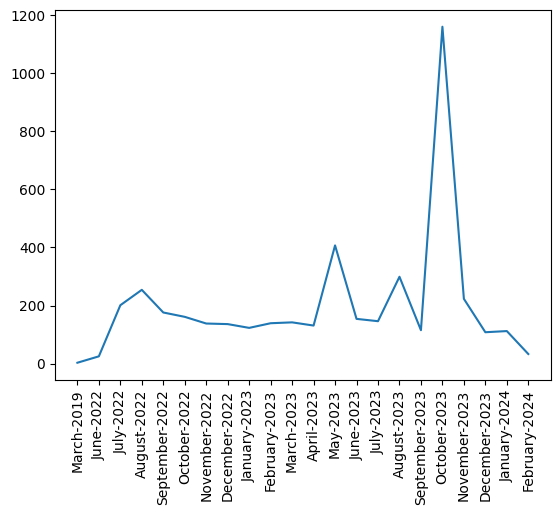

In [273]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()


In [274]:
df['theday']=
day_timeline=df.groupby(['theday']).count()['messpd.to_datetime(df['date']).dt.dateage'].reset_index()

/var/folders/3t/5qtlv2451k3fkqv9ls22lmg00000gn/T/ipykernel_88024/766041603.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['theday']=pd.to_datetime(df['date']).dt.date


In [275]:
day_timeline

,theday,message
0,2019-03-20,3
1,2022-06-28,1
2,2022-06-29,15
3,2022-06-30,9
4,2022-07-01,2
...,...,...
483,2024-02-03,8
484,2024-02-04,3
485,2024-02-05,3
486,2024-02-07,10


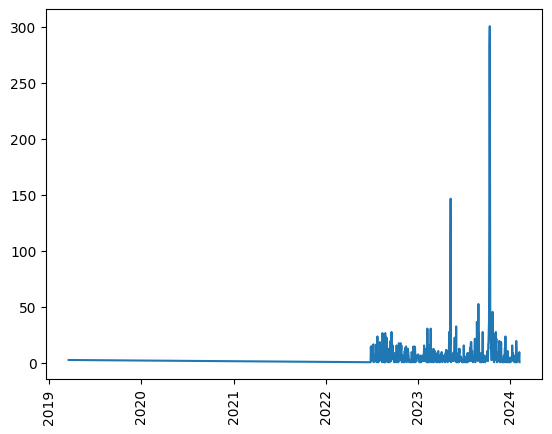

In [277]:
plt.plot(day_timeline['theday'],day_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [281]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,theday,day_name
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12,3,2019-03-20,<bound method PandasDelegate._add_delegate_acc...
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12,3,2019-03-20,<bound method PandasDelegate._add_delegate_acc...
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12,3,2019-03-20,<bound method PandasDelegate._add_delegate_acc...
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28,6,2022-06-28,<bound method PandasDelegate._add_delegate_acc...
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50,6,2022-06-29,<bound method PandasDelegate._add_delegate_acc...


In [287]:
#on which day any user is most active
df['day_name']=pd.to_datetime(df['theday']).dt.day_name()

In [289]:
df['day_name'].value_counts()

day_name
Thursday     911
Wednesday    742
Friday       688
Tuesday      647
Monday       495
Sunday       456
Saturday     447
Name: count, dtype: int64

day_name
<bound method PandasDelegate._add_delegate_accessors.<locals>._create_delegator_method.<locals>.f of <pandas.core.indexes.accessors.DatetimeProperties object at 0x129db8910>>    4386
Name: count, dtype: int64

In [290]:
#activity time heat map
duration=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        duration.append(str(hour) + "-"+ str("0"))
    elif hour==0:
        duration.append(str('00')+ "-"+ str(hour+1))
    else:
        duration.append(str(hour)+"-"+str(hour+1))

df['period']=duration

In [293]:
from urlextract import URLExtract
url_extract=URLExtract()

links=[]
for message in df['message']:
    links.extend(url_extract.find_urls(message))
    
df['link_shared']=links

In [294]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,theday,day_name,duration,period
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18,17-18
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18,17-18
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18,17-18
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28,6,2022-06-28,Tuesday,00-1,00-1
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50,6,2022-06-29,Wednesday,13-14,13-14


In [295]:
df.drop(columns=['duration'],axis=1,inplace=True)

In [296]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,theday,day_name,period
0,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎Messages and calls are end-to-end encrypted. ...,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18
2,2019-03-20 05:12:32 PM,Technion Indians 🇮🇳,‎You were added\n,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28,6,2022-06-28,Tuesday,00-1
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50,6,2022-06-29,Wednesday,13-14


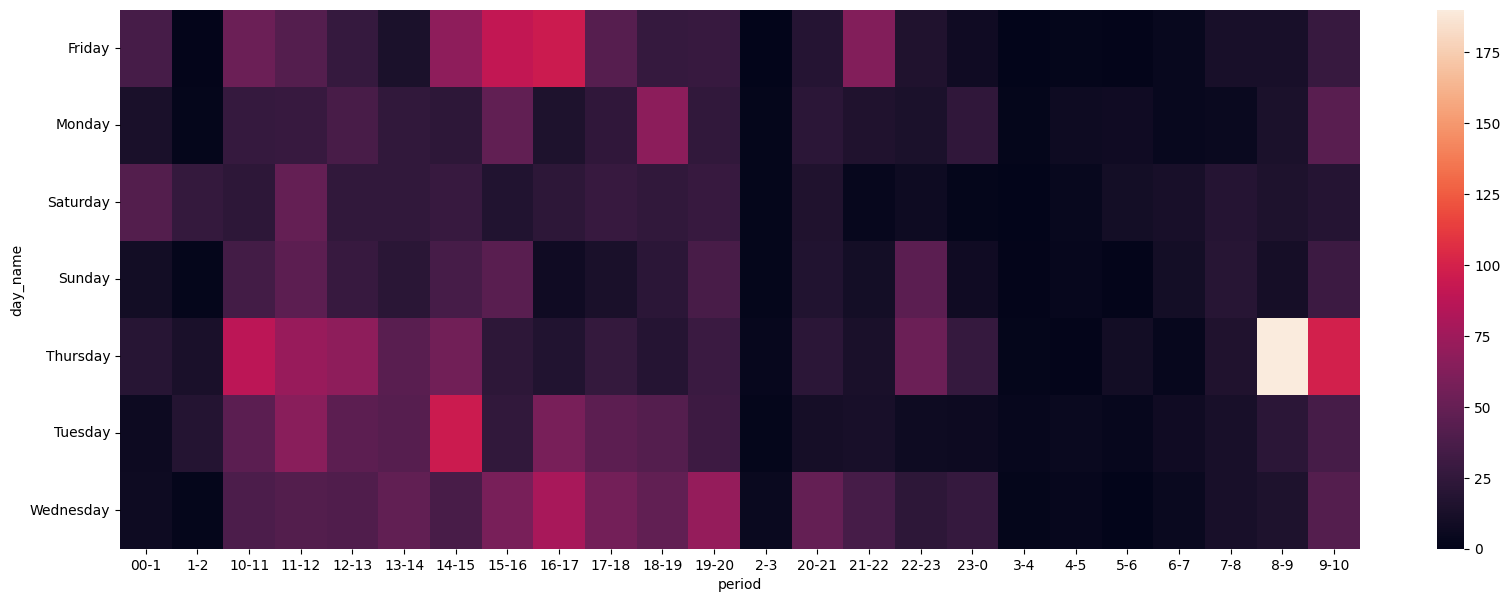

In [297]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df.pivot_table(index="day_name",columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()

In [298]:
! pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.1 MB/s eta 0:00:0000:0100:010m
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.0/291.0 kB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)


In [328]:
df = df[~df['message'].str.contains("Messages and calls are end-to-end encrypted.")]
df = df[~df['message'].str.contains("You were added")]
df.head()

,date,user,message,year,month,day,hour,minute,month_num,theday,day_name,period
1,2019-03-20 05:12:32 PM,Barun,‎~ Barun created this group\n,2019,March,20,17,12,3,2019-03-20,Wednesday,17-18
3,2022-06-28 12:28:31 AM,Abhisek,"Hi, does anyone have any experience of sending...",2022,June,28,0,28,6,2022-06-28,Tuesday,00-1
4,2022-06-29 01:50:53 PM,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...,2022,June,29,13,50,6,2022-06-29,Wednesday,13-14
5,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n‎,2022,June,29,13,50,6,2022-06-29,Wednesday,13-14
6,2022-06-29 01:50:53 PM,Mihir Mogra,‎image omitted\n,2022,June,29,13,50,6,2022-06-29,Wednesday,13-14


In [310]:
import pandas as pd

# Assuming df is your original DataFrame
df1 = df[['user', 'message']]



df1.head()


,user,message
1,Barun,‎~ Barun created this group\n
3,Abhisek,"Hi, does anyone have any experience of sending..."
4,Mihir Mogra,Mata Ni Pachedi is a 300-year old rare yet bea...
5,Mihir Mogra,‎image omitted\n‎
6,Mihir Mogra,‎image omitted\n


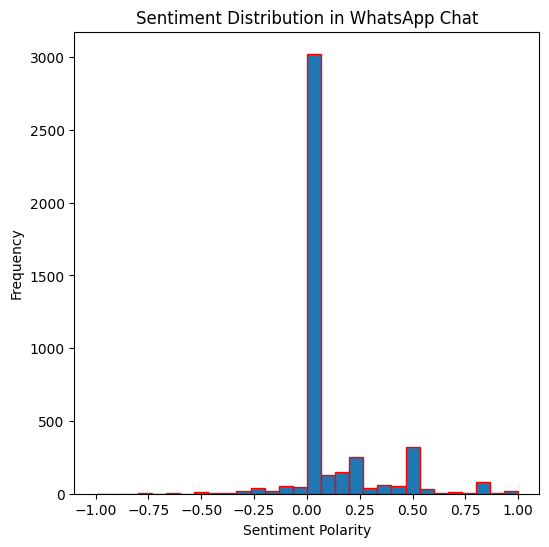

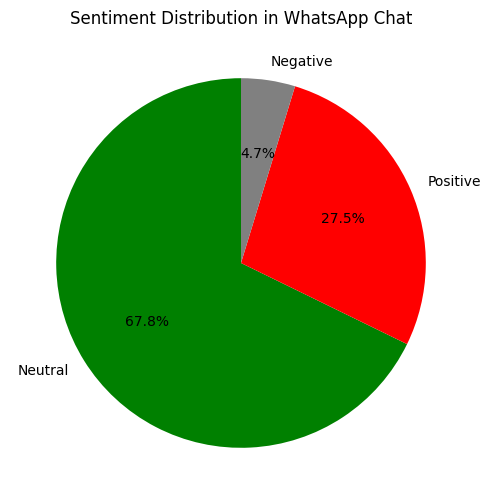

In [326]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with 'user' and 'message' columns

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to each message
def apply_sentiment_analysis(df):
    df['sentiment'] = df['message'].apply(analyze_sentiment)
    return df

def plot_sentiment_distribution(df):
    plt.figure(figsize=(6, 6))
    plt.hist(df['sentiment'], bins=30, edgecolor='red', alpha=1)
    plt.title('Sentiment Distribution in WhatsApp Chat')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()

# Plot sentiment distribution as a pie chart
def plot_sentiment_pie_chart(df):
    sentiment_counts = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    sentiment_distribution = sentiment_counts.value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution in WhatsApp Chat')
    plt.show()

# Example usage
whatsapp_df = apply_sentiment_analysis(df1)
plot_sentiment_distribution(whatsapp_df)
plot_sentiment_pie_chart(whatsapp_df)


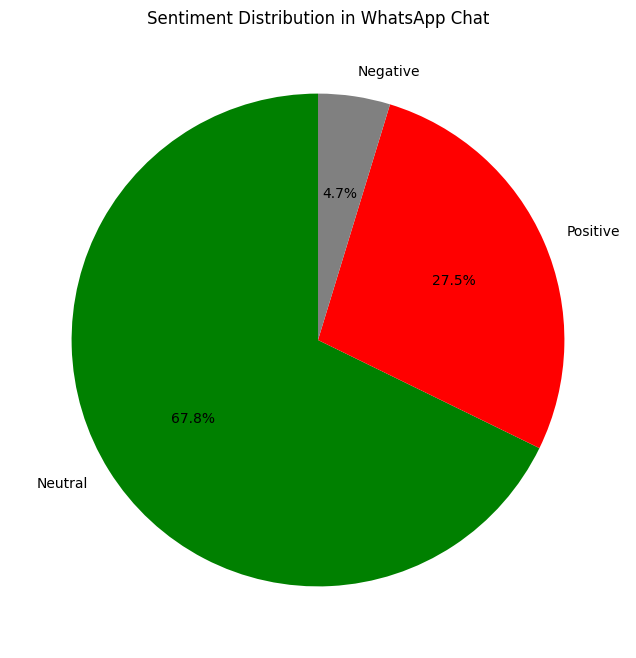

In [329]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame with 'user' and 'message' columns

# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return 'Positive' if analysis.sentiment.polarity > 0 else ('Negative' if analysis.sentiment.polarity < 0 else 'Neutral')

# Apply sentiment analysis and remove specific messages to the original DataFrame
def apply_sentiment_analysis(df):
    df['sentiment'] = df['message'].apply(analyze_sentiment)
    return df

# Plot sentiment distribution
def plot_sentiment_distribution(df):
    sentiment_counts = df['sentiment'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'gray'])
    plt.title('Sentiment Distribution in WhatsApp Chat')
    plt.show()

# Example usage
df = apply_sentiment_analysis(df)
plot_sentiment_distribution(df)


ValueError: Length of values (121) does not match length of index (4384)